In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Data
## Data prepearation
### Load data

In [ ]:
data_dir = 'data/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/'
raw_df = pd.read_csv(data_dir + 'all_features.csv')

raw_df.head()

,chroma_1_t0,chroma_2_t0,chroma_3_t0,chroma_4_t0,chroma_5_t0,chroma_6_t0,chroma_7_t0,chroma_8_t0,chroma_9_t0,chroma_10_t0,...,mfcc_4_t29,mfcc_5_t29,mfcc_6_t29,mfcc_7_t29,mfcc_8_t29,mfcc_9_t29,mfcc_10_t29,mfcc_11_t29,genre,name
0,0.626486,0.608501,0.754525,0.674387,0.576804,0.551831,0.539350,0.541972,0.485062,0.550331,...,52.230085,-0.062665,19.247073,-17.744434,19.848744,-11.129557,5.167890,-8.109643,blues,blues.00000
1,0.826133,0.865588,0.918545,0.919136,0.913994,0.880199,0.798401,0.757096,0.745322,0.744550,...,33.811702,-10.992984,25.247924,-13.988615,38.575361,-19.785704,10.644850,-10.361125,blues,blues.00001
2,0.585395,0.520500,0.585732,0.682242,0.666949,0.513813,0.496359,0.434128,0.509338,0.638215,...,25.175545,-13.213935,34.443375,-15.726396,18.739466,-9.231361,16.841569,-14.992088,blues,blues.00002
3,0.633619,0.731000,0.821404,0.905540,0.973202,0.991830,0.911364,0.820693,0.748203,0.663411,...,34.304552,8.861958,21.319452,-13.507079,-2.667694,-0.820629,0.585420,-17.125043,blues,blues.00003
4,0.452599,0.538257,0.535290,0.458681,0.498907,0.491594,0.281342,0.289324,0.474442,0.638441,...,34.303379,-41.823919,16.842120,-31.417867,1.010237,-11.922104,3.215301,-11.559017,blues,blues.00004


### Invalid valuesx

In [ ]:
print(f'Null values: {raw_df.isnull().sum().sum()}') 
raw_df = raw_df.dropna()

Null values: 0


## Define and split data
### Define unique genres

In [ ]:
genres = raw_df['genre'].unique()
genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

### Split data by time-slot

In [ ]:
time_df = []
labels = raw_df[["genre", "name"]]

for i in range(0, len(raw_df.columns) - 2):
    col_name = raw_df.columns[i]
    type_name = col_name[:col_name.rfind('t')-1]
    index = int(col_name[col_name.rfind('t')+1:])
    if len(time_df) == index:
        time_df.insert(index, pd.DataFrame())
        time_df[index]['genre'] = labels['genre']
        time_df[index]['name'] = labels['name']
    
    time_df[index][type_name] = raw_df[col_name]
    
time_df[0].describe()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.564375,0.561361,0.579284,0.589782,0.604178,0.603844,0.572295,0.571670,0.553762,0.551701,...,102.038103,-9.965088,37.922796,-1.812863,15.580170,-6.048632,10.892958,-7.890248,8.359007,-6.651854
std,0.173797,0.169726,0.177258,0.179344,0.178975,0.184485,0.169025,0.166321,0.157545,0.163495,...,35.435695,25.784280,18.786796,14.910361,13.612199,12.000959,11.573077,10.059118,9.576439,8.583780
min,0.025769,0.033791,0.029935,0.023247,0.010565,0.008563,0.018996,0.034452,0.033401,0.030352,...,-0.928548,-94.068320,-26.109149,-63.342422,-39.319729,-42.053555,-35.153192,-39.657289,-21.301620,-39.215588
25%,0.454349,0.453612,0.466611,0.480200,0.490216,0.487549,0.466006,0.469424,0.457045,0.446034,...,77.328465,-27.691751,25.273600,-12.325800,5.594085,-15.371762,2.692922,-15.328936,1.156931,-12.786343
50%,0.584124,0.579162,0.600632,0.613531,0.624234,0.623594,0.596034,0.590805,0.571059,0.565792,...,98.375255,-12.180432,38.693981,-1.499484,15.632962,-6.400413,10.993771,-8.463328,8.715892,-6.478100
75%,0.680175,0.678897,0.708678,0.722919,0.735687,0.738676,0.697696,0.688823,0.665647,0.667432,...,124.641044,6.445721,50.515112,8.610915,25.888452,3.027193,19.783544,-0.315575,15.317919,-0.533431
max,1.000000,0.999659,0.999354,0.967952,1.000000,0.991830,0.947429,0.999893,0.988717,0.973744,...,210.175876,92.784082,95.093154,48.125951,53.929497,40.755288,42.418468,22.949098,37.129847,22.903184


### Split data by type

In [ ]:
type_df = {}

for i in range(0, len(raw_df) - 2):
    col_name = raw_df.columns[i]
    type_name = col_name[:col_name.rfind('t')-1]
    if type_name not in type_df:
        type_df[type_name] = pd.DataFrame()
        type_df[type_name]['genre'] = labels['genre']
        type_df[type_name]['name'] = labels['name']
        
    type_df[type_name][col_name] = raw_df[col_name]

type_df["chroma_1"].describe()

,chroma_1_t0,chroma_1_t1,chroma_1_t2,chroma_1_t3,chroma_1_t4,chroma_1_t5,chroma_1_t6,chroma_1_t7,chroma_1_t8,chroma_1_t9,...,chroma_1_t14,chroma_1_t15,chroma_1_t16,chroma_1_t17,chroma_1_t18,chroma_1_t19,chroma_1_t20,chroma_1_t21,chroma_1_t22,chroma_1_t23
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.564375,0.571594,0.568870,0.567547,0.567960,0.568847,0.560712,0.561484,0.564966,0.571353,...,0.568298,0.567558,0.565283,0.576434,0.570779,0.568191,0.564512,0.565389,0.566782,0.562352
std,0.173797,0.176314,0.171068,0.169395,0.176378,0.174239,0.172212,0.169857,0.174889,0.175976,...,0.174094,0.170815,0.169203,0.168642,0.170840,0.168133,0.166324,0.170818,0.167758,0.170290
min,0.025769,0.000000,0.043444,0.031264,0.018905,0.036732,0.045543,0.024271,0.035429,0.032117,...,0.011538,0.023714,0.002192,0.040868,0.047594,0.038823,0.042711,0.040471,0.015322,0.025159
25%,0.454349,0.462550,0.463114,0.463778,0.462173,0.461530,0.450938,0.460755,0.454491,0.468974,...,0.461831,0.461188,0.459321,0.463753,0.454534,0.455033,0.453902,0.457101,0.467878,0.456820
50%,0.584124,0.587943,0.579849,0.579866,0.579598,0.580926,0.577000,0.578594,0.579669,0.584556,...,0.580815,0.585393,0.573542,0.596858,0.579364,0.576206,0.578815,0.578302,0.585296,0.573379
75%,0.680175,0.693075,0.688447,0.686416,0.688483,0.688062,0.687368,0.682121,0.693526,0.696620,...,0.686649,0.688509,0.688085,0.699952,0.688365,0.692433,0.672187,0.685447,0.679687,0.676528
max,1.000000,0.987098,1.000000,0.994262,0.999869,0.992028,0.994544,0.979345,0.996886,0.992040,...,0.998494,0.989666,0.996902,1.000000,0.999036,1.000000,0.998295,1.000000,0.987814,0.991635


### Split data by genre

In [ ]:
genre_df = {}

for genre in raw_df['genre'].unique():
    genre_df[genre] = pd.DataFrame()
    genre_df[genre] = raw_df[:][raw_df['genre'] == genre]
    genre_df[genre].drop(columns=['genre', 'name'], inplace=True)

genre_df['blues'].describe()

,chroma_1_t0,chroma_2_t0,chroma_3_t0,chroma_4_t0,chroma_5_t0,chroma_6_t0,chroma_7_t0,chroma_8_t0,chroma_9_t0,chroma_10_t0,...,mfcc_2_t29,mfcc_3_t29,mfcc_4_t29,mfcc_5_t29,mfcc_6_t29,mfcc_7_t29,mfcc_8_t29,mfcc_9_t29,mfcc_10_t29,mfcc_11_t29
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.591039,0.573944,0.582604,0.587742,0.598322,0.596908,0.551870,0.553318,0.546919,0.567465,...,121.609066,-11.383654,46.863786,-6.710808,24.031527,-12.547511,15.334873,-14.323266,8.693422,-11.952031
std,0.162257,0.144452,0.159740,0.169005,0.166218,0.173394,0.160153,0.146467,0.150880,0.168884,...,26.395343,23.280477,15.787556,16.412673,9.498554,10.992120,10.390036,7.859596,8.181774,8.500522
min,0.217756,0.261153,0.217265,0.182774,0.150613,0.159689,0.210634,0.188166,0.195365,0.153774,...,76.095493,-83.883438,-4.961076,-44.362572,3.857114,-46.337239,-10.066994,-33.944911,-9.597909,-31.639951
25%,0.481069,0.473192,0.457770,0.471483,0.486403,0.481111,0.439710,0.455341,0.437969,0.480633,...,100.097945,-28.030986,35.667377,-16.725088,17.684841,-19.342626,8.608075,-19.383293,3.210654,-17.047795
50%,0.596999,0.566369,0.589453,0.589620,0.607573,0.587118,0.546307,0.568957,0.547618,0.578803,...,119.566542,-13.322719,45.450384,-4.150050,23.327422,-13.760946,15.432751,-13.595632,8.915039,-11.166884
75%,0.698605,0.665327,0.711132,0.697492,0.722826,0.712139,0.673142,0.668981,0.655824,0.676684,...,139.800604,4.752234,57.369800,6.647675,31.082802,-4.078252,22.181859,-9.411787,13.392700,-7.056879
max,0.968480,0.947443,0.919995,0.935489,0.973202,0.991830,0.914484,0.820693,0.872169,0.907119,...,192.812339,37.460871,85.340963,25.955029,46.134704,11.460428,43.759051,3.923315,32.057994,7.601049


### Mean value per genre

In [ ]:
mean_params_per_genre = {}

for genre in genre_df:
    vals = genre_df[genre].apply(np.mean)
    mean_params_per_genre[genre] = pd.DataFrame()
    
    for label in vals.index:
        info = label.split('_')
        
        name = ""
        if len(info) > 2:
            name = '_'.join(info[:-1])
        else:
            name = info[0]
            
        time = int(info[-1][1:])
        
        
        if name not in mean_params_per_genre[genre]:
            mean_params_per_genre[genre][name] = pd.Series(dtype='float64')
        
        mean_params_per_genre[genre].loc[time, name] = float(vals[label])
            
mean_params_per_genre['blues']

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11
0,0.591039,0.573944,0.582604,0.587742,0.598322,0.596908,0.551870,0.553318,0.546919,0.567465,...,118.184538,-10.422864,48.460680,-4.912338,23.992865,-11.991084,16.199988,-14.516477,9.391906,-10.935929
1,0.596212,0.573164,0.571498,0.570812,0.586225,0.595703,0.548922,0.535937,0.543503,0.564672,...,117.517526,-8.618076,49.167136,-5.394815,24.648154,-11.653115,14.909041,-13.218492,9.765190,-10.952200
2,0.580245,0.549547,0.554671,0.565147,0.592775,0.584089,0.524620,0.535434,0.552808,0.577550,...,115.951077,-8.940430,48.377472,-5.468702,25.127500,-12.007905,14.722419,-14.102167,9.581996,-11.364220
3,0.582995,0.566816,0.570988,0.582022,0.614224,0.630199,0.565339,0.546103,0.557320,0.563382,...,115.226829,-8.282740,47.729532,-6.577981,25.338671,-12.832519,16.869425,-15.041630,10.654245,-10.686120
4,0.574848,0.555423,0.553874,0.559630,0.578542,0.587505,0.547296,0.545948,0.557851,0.575068,...,115.770001,-8.424803,48.649527,-5.774714,25.673992,-12.233485,16.414052,-14.811285,9.663250,-10.923200
5,0.574881,0.550934,0.536632,0.535519,0.573389,0.595323,0.552401,0.547902,0.550088,0.574154,...,117.004359,-10.977195,49.415162,-6.667432,23.587326,-11.968395,15.192491,-13.623167,9.632331,-11.264494
6,0.581827,0.544019,0.537283,0.544819,0.581468,0.594372,0.550090,0.548912,0.559310,0.591697,...,116.517755,-10.665524,49.029662,-5.367546,24.428166,-12.002741,15.242919,-13.790393,9.974404,-11.595207
7,0.576879,0.544655,0.541507,0.547220,0.584421,0.580209,0.547420,0.555226,0.557702,0.563647,...,114.734554,-11.444627,49.077879,-5.470427,24.792504,-12.220040,15.757527,-14.458167,10.220802,-11.367410
8,0.589751,0.578536,0.570590,0.572674,0.594119,0.602524,0.552629,0.557639,0.560055,0.562359,...,117.451365,-11.315969,49.006379,-4.825043,23.984585,-11.834367,15.683591,-14.196965,9.460127,-10.582839
9,0.584594,0.572065,0.575207,0.574895,0.588358,0.590681,0.543604,0.547177,0.559799,0.574245,...,117.607264,-10.139731,50.210457,-5.380198,24.033758,-12.528441,16.413381,-14.067871,9.654923,-11.304107


## Data analisys
### Chroma values

In [ ]:

chroma_labels = {"chroma_1" : "C",
                 "chroma_2" : "C#",
                 "chroma_3" : "D",
                 "chroma_4" : "D#",
                 "chroma_5" : "E",
                 "chroma_6" : "F",
                 "chroma_7" : "F#",
                 "chroma_8" : "G",
                 "chroma_9" : "G#",
                 "chroma_10" : "A",
                 "chroma_11" : "A#",
                 "chroma_12" : "B"
                 }

@interact
def peek_song_chroma(num: int, genre = genres):
    song = genre_df[genre].iloc[num]
    
    chroma_features = pd.DataFrame()
    for i in range(1, 13):
        chroma_features[f'chroma_{i}'] = pd.Series(dtype='float64')
        for time in range(0, 30):
            chroma_features.loc[time, f'chroma_{i}'] = song[f'chroma_{i}_t{time}']
    
    sns.heatmap(chroma_features.rename(columns=chroma_labels).transpose(), cmap='coolwarm')    

interactive(children=(IntText(value=0, description='num'), Dropdown(description='genre', options=('blues', 'cl…

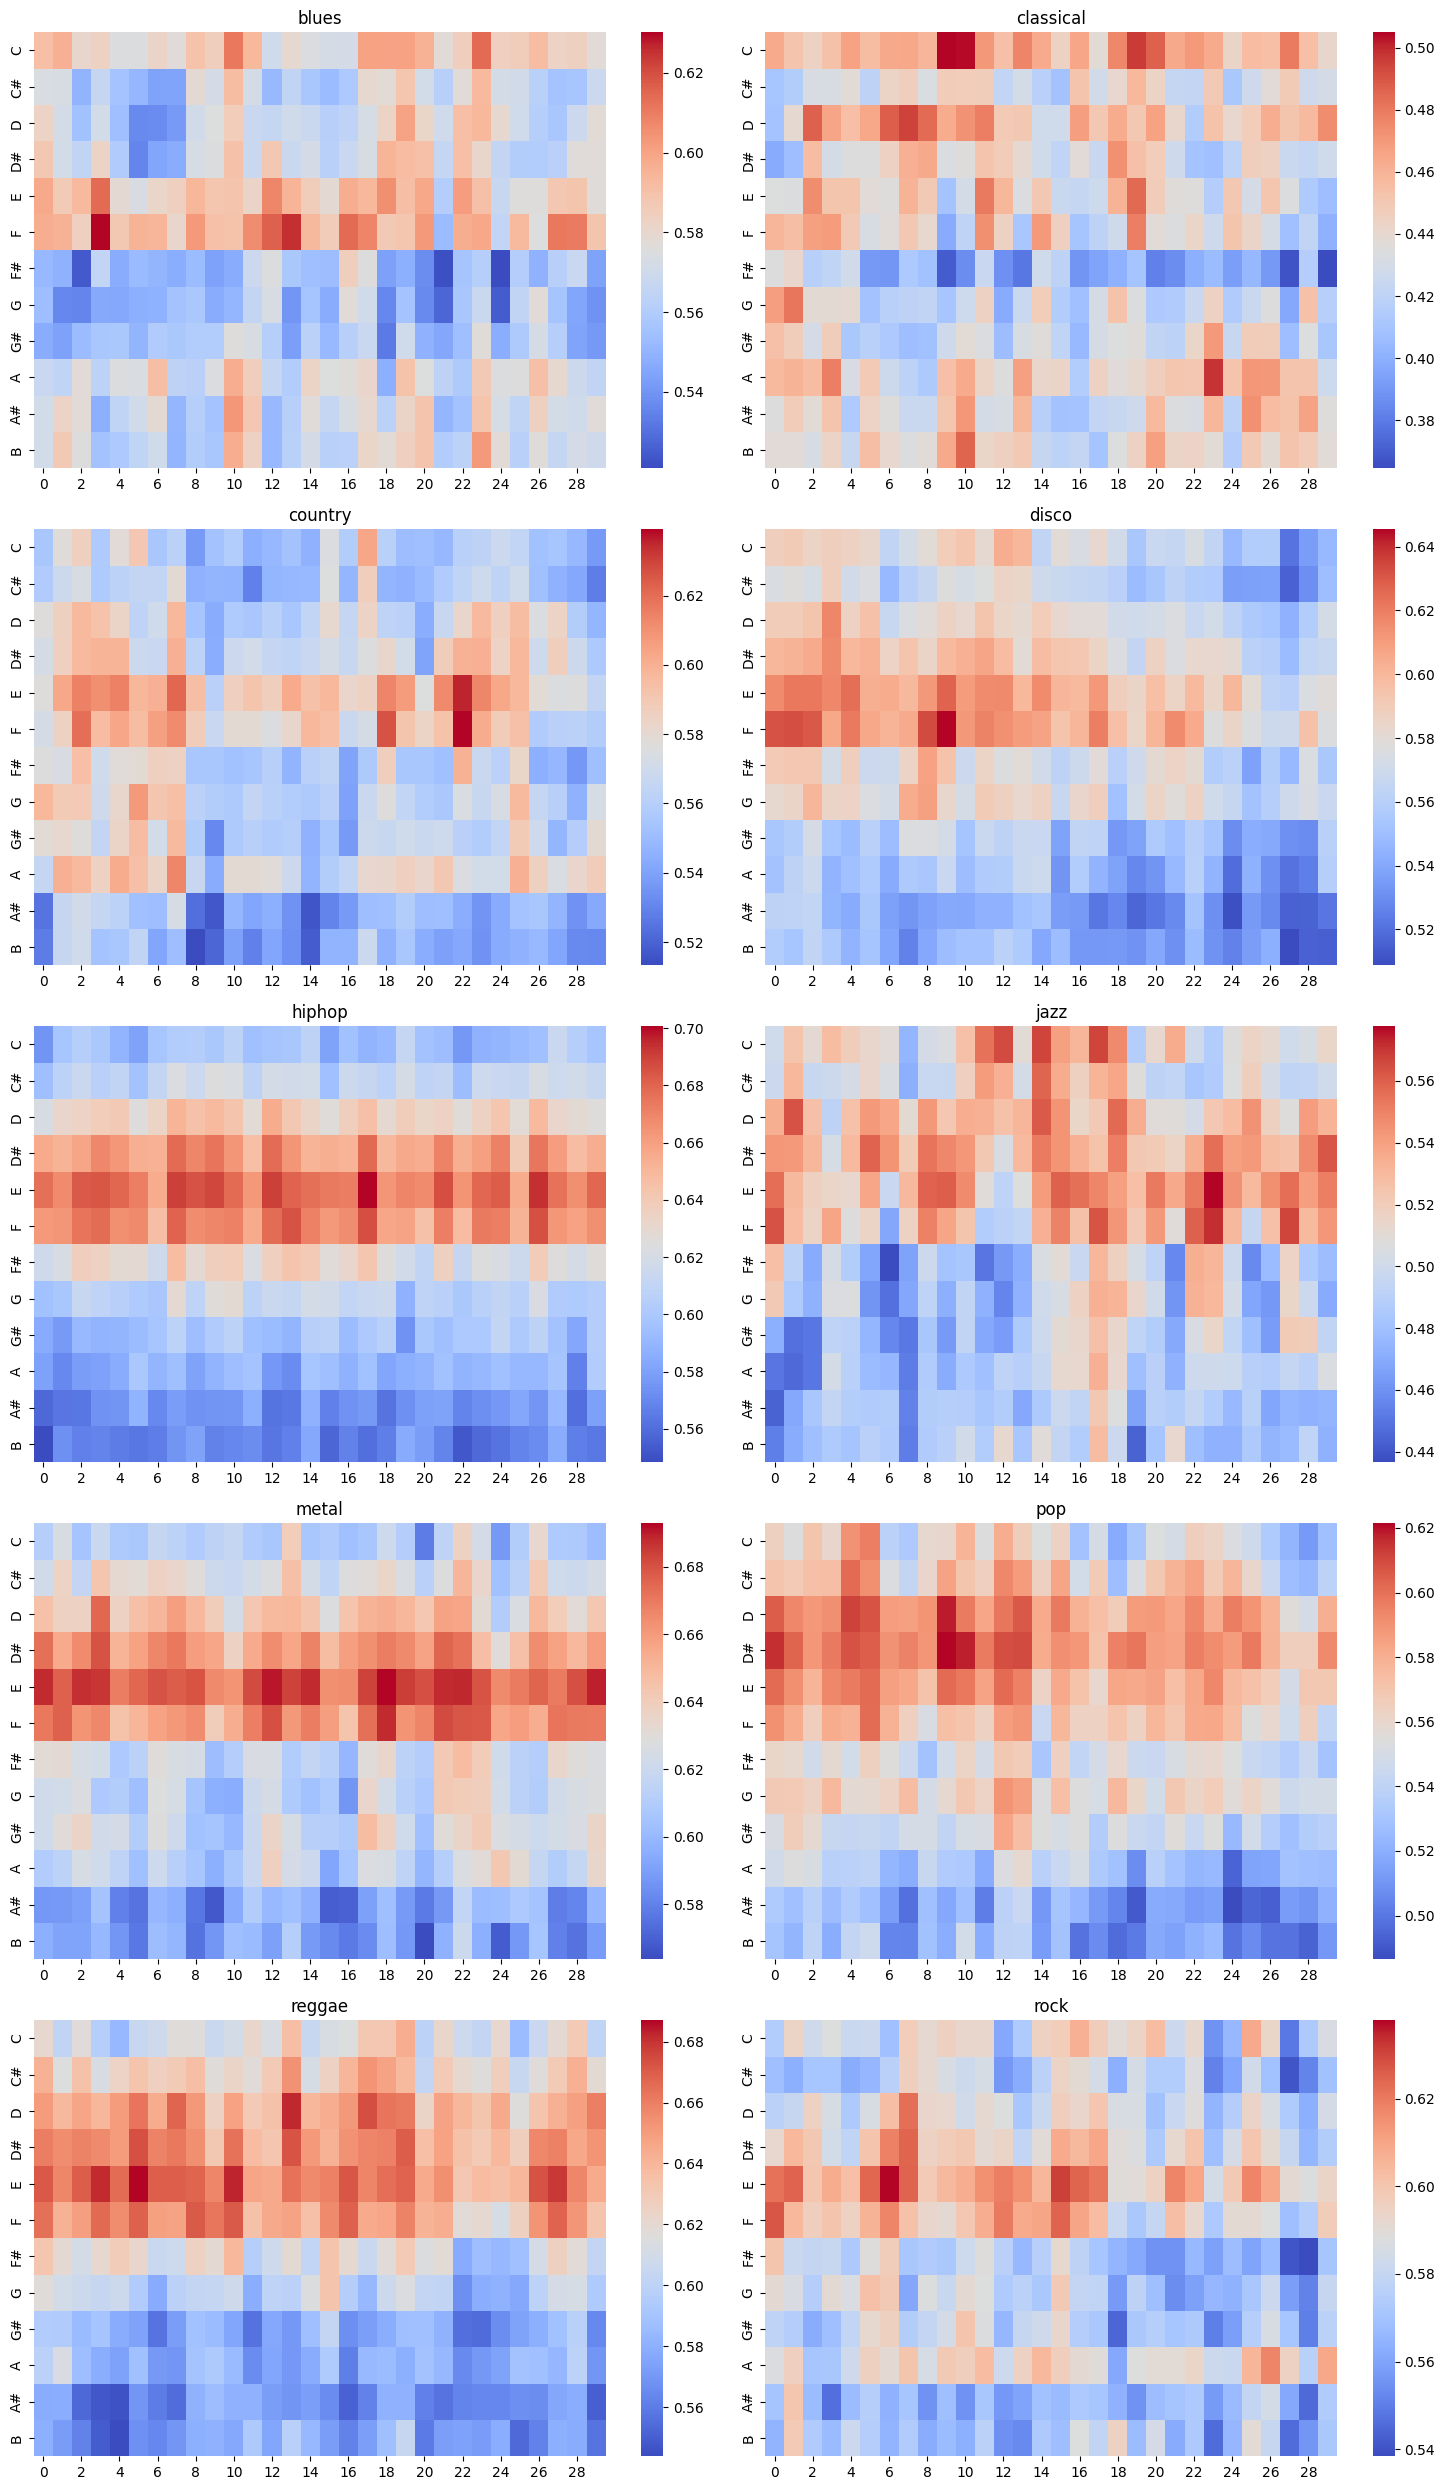

In [ ]:
mean_chroma_per_genre = {}


for genre in mean_params_per_genre:
    r_df = mean_params_per_genre[genre]
    mean_chroma_per_genre[genre] = r_df.filter(like='chroma', axis=1).copy()
    mean_chroma_per_genre[genre].rename(columns=chroma_labels, inplace=True)
    
num_genres = len(genres)
cols = 2
rows = (num_genres // cols) + (num_genres % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, genre in enumerate(genres):
    if genre in mean_chroma_per_genre:
        ax = axes[i]
        sns.heatmap(mean_chroma_per_genre[genre].transpose(), cmap='coolwarm', ax=ax)
        ax.set_title(genre)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
chroma_with_genre = pd.concat([mean_chroma_per_genre[genre].mean() for genre in genres], keys=genres, names=['genre'])

chroma_with_genre

genre    
blues  C     0.586146
       C#    0.566337
       D     0.569425
       D#    0.571538
       E     0.588079
               ...   
rock   G     0.576881
       G#    0.574917
       A     0.590909
       A#    0.566855
       B     0.570644
Length: 120, dtype: float64

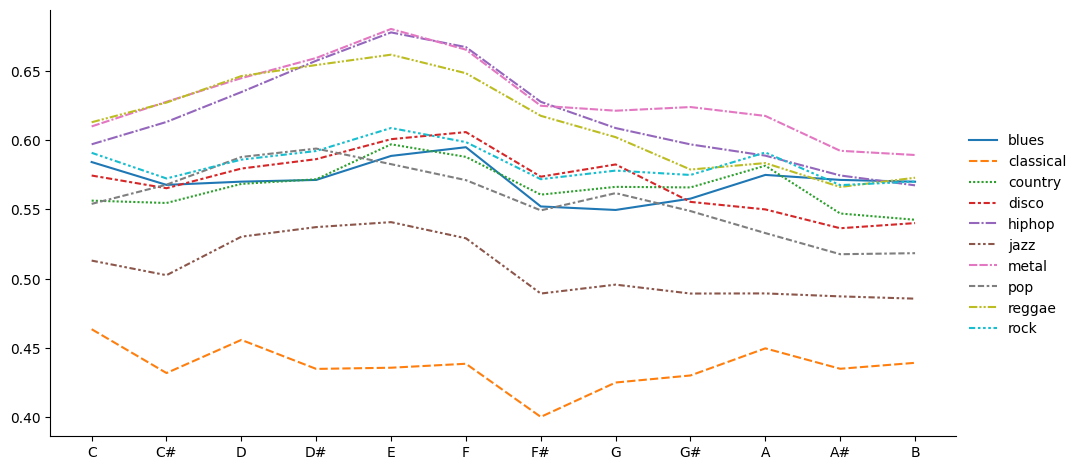

In [ ]:
chroma_per_genre_no_time = pd.DataFrame()

def variance(row):
    return np.var(row)

for genre in mean_chroma_per_genre:
    chroma_per_genre_no_time[genre] = mean_chroma_per_genre[genre].apply(np.median, axis=0)
    
sns.relplot(data=chroma_per_genre_no_time, kind='line', aspect=2)

### Tempo analisys

In [ ]:
@interact(num = widgets.IntSlider(min = 0, max = 99, value = 0))
def peek_song_tempo(num: int, genre = genres):
    song = genre_df[genre].iloc[num]
    
    tempo = pd.Series(dtype='float64')
    for time in range(0, 30):
        tempo[time] = song[f'tempo_t{time}']
    
    sns.relplot(data=tempo, kind='line', aspect=2)

interactive(children=(IntSlider(value=0, description='num', max=99), Dropdown(description='genre', options=('b…